# Sentiment Analysis
Sentiment analysis using svm classifier
* baseline model
* hyperparameter tuning
* tuned model

## Import and install required libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## Read dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/train_aug.csv')

train_df.head()

,clean_text,manual_label
0,meebit bought eth usd blur meebits meebitsnft,pos
1,check tyler nft weekly preview analyzes market...,neu
2,meebits triple floor check opensea listing flo...,neu
3,clonex sold eth previously sold eth nft collec...,pos
4,mutant ape yacht club sold weth previously sol...,pos


In [4]:
X_train, y_train = train_df['clean_text'], train_df['manual_label']

In [5]:
test_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/test.csv')

test_df.head()

,clean_text,manual_label
0,day mapo tofu healthy meal mean tofu got ta co...,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu
2,nft lending agreement benddao ethereum reserve...,pos
3,meebit bought eth usd blur meebits meebitsnft,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos


In [6]:
X_test, y_test = test_df['clean_text'], test_df['manual_label']

In [7]:
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [8]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

## Baseline svm model

In [9]:
SVM_classifier = svm.SVC()

SVM_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
t0 = time.time()

SVM_classifier = svm.SVC().fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [11]:
print("Training time: %fs" % (time_linear_train))

Training time: 1.225796s


In [12]:
y_pred=SVM_classifier.predict(X_test_vectorized)

In [13]:
print(accuracy_score(y_test, y_pred))

0.8175


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.65      0.62      0.63        21
         neu       0.74      0.58      0.65       102
         pos       0.85      0.92      0.88       277

    accuracy                           0.82       400
   macro avg       0.75      0.71      0.72       400
weighted avg       0.81      0.82      0.81       400



## Hyperparameter tuning

* C
* kernel
* gamma
* degree
* class_weight 

### C

In [15]:
param_grid = { 
    "C": [0.1, 1, 10, 30, 50, 70, 100]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [16]:
grid_search = GridSearchCV(estimator=SVM_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [17]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8480
The best hyperparameters are {'C': 10}


### kernel

In [18]:
param_grid = { 
    "C": [10],
    "kernel": ['rbf', 'linear', 'poly', 'sigmoid']
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [19]:
grid_search = GridSearchCV(estimator=SVM_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [20]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8491
The best hyperparameters are {'C': 10, 'kernel': 'linear'}


### gamma

In [21]:
param_grid = { 
    "C": [10],
    "kernel": ['linear'],
    "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
grid_search = GridSearchCV(estimator=SVM_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [23]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8491
The best hyperparameters are {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


### degree

In [24]:
param_grid = { 
    "C": [10],
    "kernel": ['linear'],
    "gamma": [0.0001],
    "degree": [1, 2, 3, 4, 5]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [25]:
grid_search = GridSearchCV(estimator=SVM_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [26]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8491
The best hyperparameters are {'C': 10, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}


### class_weight

In [27]:
param_grid = { 
    "C": [10],
    "kernel": ['linear'],
    "gamma": [0.0001],
    "degree": [1], 
    "class_weight": [None, 'balanced']
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [28]:
grid_search = GridSearchCV(estimator=SVM_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [29]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8538
The best hyperparameters are {'C': 10, 'class_weight': 'balanced', 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}


## Tuned svm model

In [30]:
t0 = time.time()

SVM_classifier_tuned = svm.SVC(
    C = 10, 
    class_weight = 'balanced',  
    degree = 1, 
    gamma = 0.0001, 
    kernel = 'linear'
    ).fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [31]:
SVM_classifier_tuned.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 0.0001,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
print("Training time: %fs" % (time_linear_train))

Training time: 1.510006s


In [33]:
y_pred=SVM_classifier_tuned.predict(X_test_vectorized)

In [34]:
print(accuracy_score(y_test, y_pred))

0.805


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.50      0.43      0.46        21
         neu       0.66      0.67      0.66       102
         pos       0.88      0.88      0.88       277

    accuracy                           0.81       400
   macro avg       0.68      0.66      0.67       400
weighted avg       0.80      0.81      0.80       400



## Apply on full dataset

In [36]:
df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/full_dataset_final.csv')

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k


In [37]:
df.isnull().values.any()

False

In [38]:
full_vectors = vectorizer.transform(df['clean_text'])

In [39]:
full_prediction_linear = SVM_classifier.predict(full_vectors)

In [40]:
df['svm'] = full_prediction_linear.tolist()

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,svm
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [41]:
total_counts = len(df.index)

total_counts

20295

In [42]:
counts = df['svm'].value_counts()

counts

pos    15976
neu     3558
neg      761
Name: svm, dtype: int64

<Axes: >

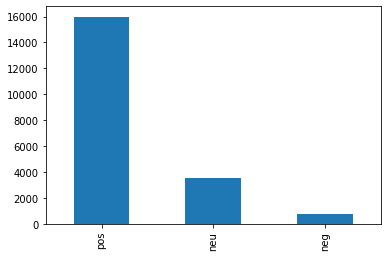

In [43]:
df['svm'].value_counts().plot.bar()

In [45]:
df.to_csv('svm_full_dataset.csv', index = False)